In [1]:
!pip install yfinance

In [2]:
import yfinance as yf  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
def get_ticker_data(ticker, start, end, interval):
    
    # import libaries
    import yfinance as yf  
    import matplotlib.pyplot as plt
    import pandas as pd
    
    # download data using yfinance libary
    df = yf.download(tickers=ticker,start=start,end=end,interval=interval)
    
    # add in column showing price % change from start date 
    df['Percent_Change'] = [(df['Close'][i] - df['Open'][i]) / df['Open'][i] * 100 for i in range(len(df['Open']))]
    df['Change_Close_Less_Open'] = [df['Close'][i] - df['Open'][i] for i in range(len(df['Open']))]
    return df

In [4]:
df_btc = get_ticker_data(ticker='BTC-USD',start='2021-01-01',end='2021-04-30',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
df_doge = get_ticker_data(ticker='DOGE-USD',start='2021-01-01',end='2021-04-30',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
df_reddit_doge = pd.read_csv('reddit_pmaw_output_dogecoin_subreddit.1.1.21-4.30.21.csv')

df_reddit_doge.head()

/Users/travis/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (79,82,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,author_flair_text_color,gallery_data,is_gallery,author_flair_template_id,poll_data,author_cakeday,banned_by,suggested_sort,gilded,top_awarded_type
0,[],False,neobz42,NaN,[],NaN,text,t2_99hi0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Randy-Candy,NaN,[],NaN,text,t2_338fg1xq,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,hshdhdjejjee,NaN,[],NaN,text,t2_5wqatt75,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Zealousideal_Fix7776,NaN,[],NaN,text,t2_6qe2ct2w,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,swirlybuns,NaN,[],NaN,text,t2_3icwxuh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_reddit_doge = df_reddit_doge[['subreddit', 'created_utc', 'subreddit_subscribers', 'num_comments']]

df_reddit_doge.head()

,subreddit,created_utc,subreddit_subscribers,num_comments
0,dogecoin,1610514616,183938,33
1,dogecoin,1610513862,183939,0
2,dogecoin,1610513002,183935,20
3,dogecoin,1610512937,183935,0
4,dogecoin,1610511229,183920,13


In [8]:
# remove bad rows

df_reddit_doge = df_reddit_doge[df_reddit_doge['subreddit'] == 'dogecoin']

df_reddit_doge.head()

,subreddit,created_utc,subreddit_subscribers,num_comments
0,dogecoin,1610514616,183938,33
1,dogecoin,1610513862,183939,0
2,dogecoin,1610513002,183935,20
3,dogecoin,1610512937,183935,0
4,dogecoin,1610511229,183920,13


In [9]:
# check value in subreddit column

df_reddit_doge['subreddit'].value_counts()

dogecoin    441767
Name: subreddit, dtype: int64

In [10]:
# convert epoch time to datetime and date

df_reddit_doge["created_utc"] = pd.to_datetime(df_reddit_doge["created_utc"],unit='s')
df_reddit_doge["created_date_utc"] = df_reddit_doge["created_utc"].dt.date

df_reddit_doge.head()


,subreddit,created_utc,subreddit_subscribers,num_comments,created_date_utc
0,dogecoin,2021-01-13 05:10:16,183938,33,2021-01-13
1,dogecoin,2021-01-13 04:57:42,183939,0,2021-01-13
2,dogecoin,2021-01-13 04:43:22,183935,20,2021-01-13
3,dogecoin,2021-01-13 04:42:17,183935,0,2021-01-13
4,dogecoin,2021-01-13 04:13:49,183920,13,2021-01-13


In [11]:
# sum rows by date, sum comments by date, and average subscribers by date

doge_comments_sum = df_reddit_doge.groupby('created_date_utc').sum()['num_comments']
doge_subscribers_avg = df_reddit_doge.groupby('created_date_utc').mean()['subreddit_subscribers']
doge_submission_count = df_reddit_doge.groupby('created_date_utc').count()['subreddit'] 


df_reddit_doge_summary = pd.DataFrame({'submissions': doge_submission_count, 
                                       'comments': doge_comments_sum, 
                                       'subscribers': doge_subscribers_avg
                                      })

df_reddit_doge_summary.head()

,submissions,comments,subscribers
created_date_utc,,,
2021-01-01,82,674,172166.853659
2021-01-02,1057,6887,173718.056764
2021-01-03,710,4528,176679.688732
2021-01-04,466,2930,178361.748927
2021-01-05,295,2509,179209.359322


In [12]:
df_combined_prices = df_doge.join(df_btc, how='inner', lsuffix='_doge', rsuffix='_btc')

df_combined_prices.index = pd.to_datetime(df_combined_prices.index).date

The correlation is 0.46
Regression Line: y = 0.0x + -0.122; r^2 = 0.207


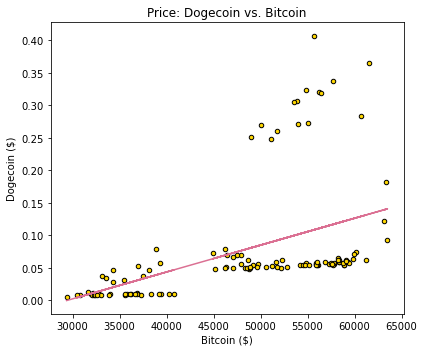

In [16]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

btc = df_combined_prices['Close_btc']
doge = df_combined_prices['Close_doge']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(btc, doge)
regress_values = btc * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots(figsize=(6,5))
df_combined_prices.plot(kind='scatter', 
                 ax=ax, 
                 x='Close_btc', 
                 y='Close_doge',
                 c='gold', 
                 marker='o', 
                 edgecolor='black'
                )

# plot trend linear regression line and annotate

ax.plot(btc, regress_values, c='palevioletred')

ax.set(title='Price: Dogecoin vs. Bitcoin',
       xlabel = 'Bitcoin ($)',
       ylabel = 'Dogecoin ($)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(btc, doge)

print(f'''The correlation is {round(correlation[0], 2)}
Regression Line: {regress_eq}''')

plt.savefig('doge_vs_btc_price.png', facecolor='white', transparent=False)

The correlation is 0.17
Regression Line: y = 0.676x + 3.45; r^2 = 0.028


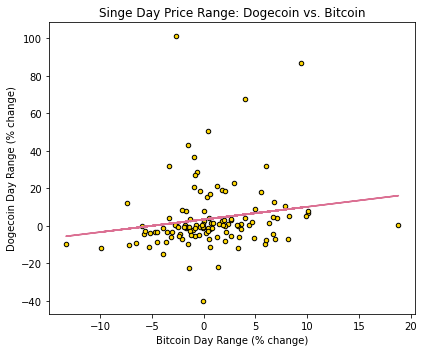

In [19]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

btc = df_combined_prices['Percent_Change_btc']
doge = df_combined_prices['Percent_Change_doge']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(btc, doge)
regress_values = btc * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots(figsize=(6,5))
df_combined_prices.plot(kind='scatter', 
                             ax=ax, 
                             x='Percent_Change_btc', 
                             y='Percent_Change_doge',
                             c='gold', 
                             marker='o', 
                             edgecolor='black'
                            )

# plot trend linear regression line and annotate

ax.plot(btc, regress_values, c='palevioletred')

ax.set(title='Singe Day Price Range: Dogecoin vs. Bitcoin',
       xlabel = 'Bitcoin Day Range (% change)',
       ylabel = 'Dogecoin Day Range (% change)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(btc, doge)

print(f'''The correlation is {round(correlation[0], 2)}
Regression Line: {regress_eq}''')

plt.savefig('doge_vs_btc_price_change.png', facecolor='white', transparent=False)


In [20]:
df_doge_price_reddit = df_doge.join(df_reddit_doge_summary, how='inner')

df_doge_price_reddit.head()

,Open,High,Low,Close,Adj Close,Volume,Percent_Change,Change_Close_Less_Open,submissions,comments,subscribers
2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,228961515,21.448413,0.001004,82,674,172166.853659
2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3421562680,86.686591,0.004929,1057,6887,173718.056764
2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2707003608,-7.838148,-0.000831,710,4528,176679.688732
2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1372398979,-0.183961,-0.000018,466,2930,178361.748927
2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,687256067,1.566504,0.000153,295,2509,179209.359322


The correlation is 0.4
Regression Line: y = 0.0x + 0.055; r^2 = 0.16


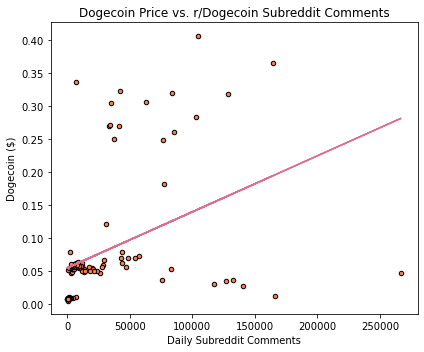

In [21]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

comments = df_doge_price_reddit['comments']
doge = df_doge_price_reddit['Close']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(comments, doge)
regress_values = comments * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots(figsize=(6,5))
df_doge_price_reddit.plot(kind='scatter', 
                 ax=ax, 
                 x='comments', 
                 y='Close',
                 c='coral',
                 marker='o', 
                 edgecolor='black'                 
                )

# plot trend linear regression line and annotate

ax.plot(comments, regress_values, c='palevioletred')

ax.set(title='Dogecoin Price vs. r/Dogecoin Subreddit Comments',
       xlabel = 'Daily Subreddit Comments',
       ylabel = 'Dogecoin ($)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(comments, doge)

print(f'''The correlation is {round(correlation[0], 2)}
Regression Line: {regress_eq}''')

plt.savefig('doge_vs_reddit_comments.png', facecolor='white', transparent=False)

The correlation is 0.25
Regression Line: y = 0.0x + 0.809; r^2 = 0.06


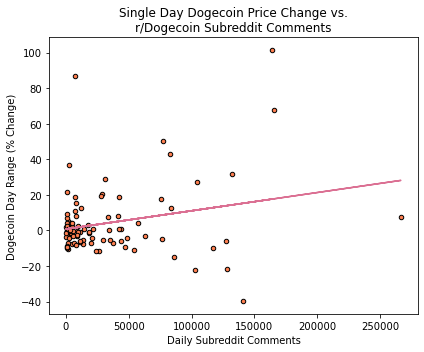

In [23]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

comments = df_doge_price_reddit['comments']
doge = df_doge_price_reddit['Percent_Change']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(comments, doge)
regress_values = comments * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots(figsize=(6,5))
df_doge_price_reddit.plot(kind='scatter', 
                 ax=ax, 
                 x='comments', 
                 y='Percent_Change',
                 c='coral',
                 marker='o', 
                 edgecolor='black'                 
                )

# plot trend linear regression line and annotate

ax.plot(comments, regress_values, c='palevioletred')

ax.set(title='''Single Day Dogecoin Price Change vs.
r/Dogecoin Subreddit Comments''',
       xlabel = 'Daily Subreddit Comments',
       ylabel = 'Dogecoin Day Range (% Change)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(comments, doge)

print(f'''The correlation is {round(correlation[0], 2)}
Regression Line: {regress_eq}''')

plt.savefig('doge_vs_reddit_comments_chagne.png', facecolor='white', transparent=False)

The correlation is 0.64
Regression Line: y = 0.0x + -0.038; r^2 = 0.414


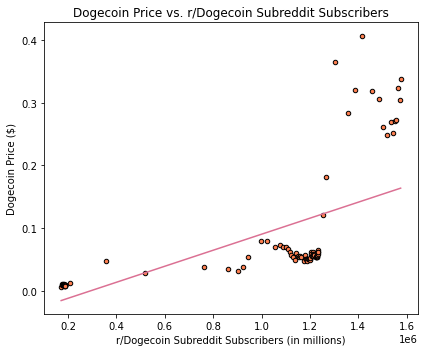

In [24]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

subscribers = df_doge_price_reddit['subscribers']
doge = df_doge_price_reddit['Close']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(subscribers, doge)
regress_values = subscribers * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots(figsize=(6,5))
df_doge_price_reddit.plot(kind='scatter', 
                 ax=ax, 
                 x='subscribers', 
                 y='Close',
                 c='coral',
                 marker='o', 
                 edgecolor='black'                 
                )

# plot trend linear regression line and annotate

ax.plot(subscribers, regress_values, c='palevioletred')

ax.set(title='Dogecoin Price vs. r/Dogecoin Subreddit Subscribers',
       xlabel = 'r/Dogecoin Subreddit Subscribers (in millions)',
       ylabel = 'Dogecoin Price ($)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(subscribers, doge)

print(f'''The correlation is {round(correlation[0], 2)}
Regression Line: {regress_eq}''')

plt.savefig('doge_vs_reddit_subscribers.png', facecolor='white', transparent=False)

The correlation is -0.03
Regression Line: y = -0.0x + 4.871; r^2 = 0.001


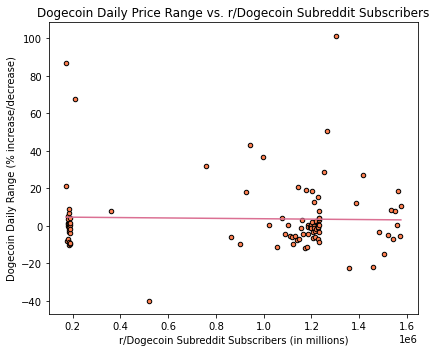

In [25]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

subscribers = df_doge_price_reddit['subscribers']
doge = df_doge_price_reddit['Percent_Change']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(subscribers, doge)
regress_values = subscribers * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots(figsize=(6,5))
df_doge_price_reddit.plot(kind='scatter', 
                 ax=ax, 
                 x='subscribers', 
                 y='Percent_Change',
                 c='coral',
                 marker='o', 
                 edgecolor='black'                 
                )

# plot trend linear regression line and annotate

ax.plot(subscribers, regress_values, c='palevioletred')

ax.set(title='Dogecoin Daily Price Range vs. r/Dogecoin Subreddit Subscribers',
       xlabel = 'r/Dogecoin Subreddit Subscribers (in millions)',
       ylabel = 'Dogecoin Daily Range (% increase/decrease)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(subscribers, doge)

print(f'''The correlation is {round(correlation[0], 2)}
Regression Line: {regress_eq}''')

plt.savefig('doge_vs_reddit_subscribers_change.png', facecolor='white', transparent=False)

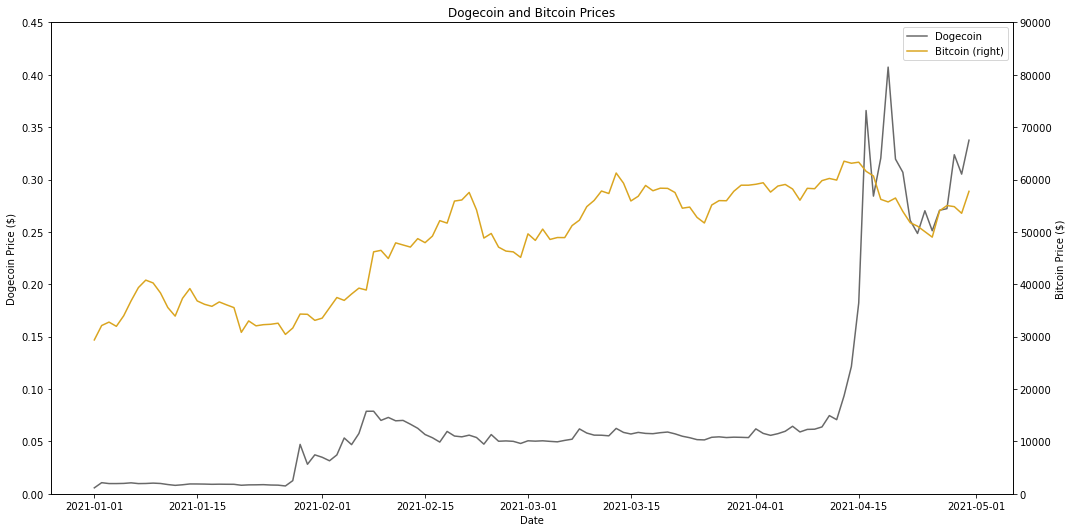

In [31]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_combined_prices['Close_doge'].plot(ax=ax, 
                                         legend=True, 
                                         label='Dogecoin', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_combined_prices['Close_btc'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='Bitcoin', 
                                               logy=False, 
                                               c='goldenrod'
                                              )

ax.set(title='Dogecoin and Bitcoin Prices',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('Bitcoin Price ($)')

ax1.set(ylim=(0, .45))
ax2.set(ylim=(0, 90000))

fig.tight_layout();

plt.savefig('doge_vs_btc_line.png', facecolor='white', transparent=False)

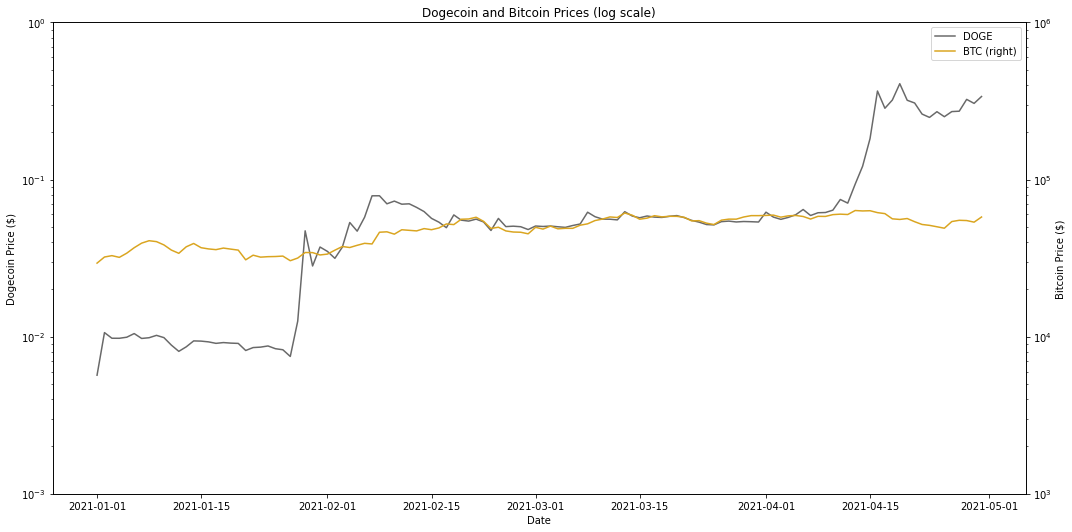

In [24]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_combined_prices['Close_doge'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE', 
                                         logy=True, 
                                         c='dimgray'
                                        )

ax2 = df_combined_prices['Close_btc'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='BTC', 
                                               logy=True, 
                                               c='goldenrod'
                                              )

ax.set(title='Dogecoin and Bitcoin Prices (log scale)',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('Bitcoin Price ($)')

ax1.set(ylim=(.001, 1))
ax2.set(ylim=(1000, 1000000))

fig.tight_layout();

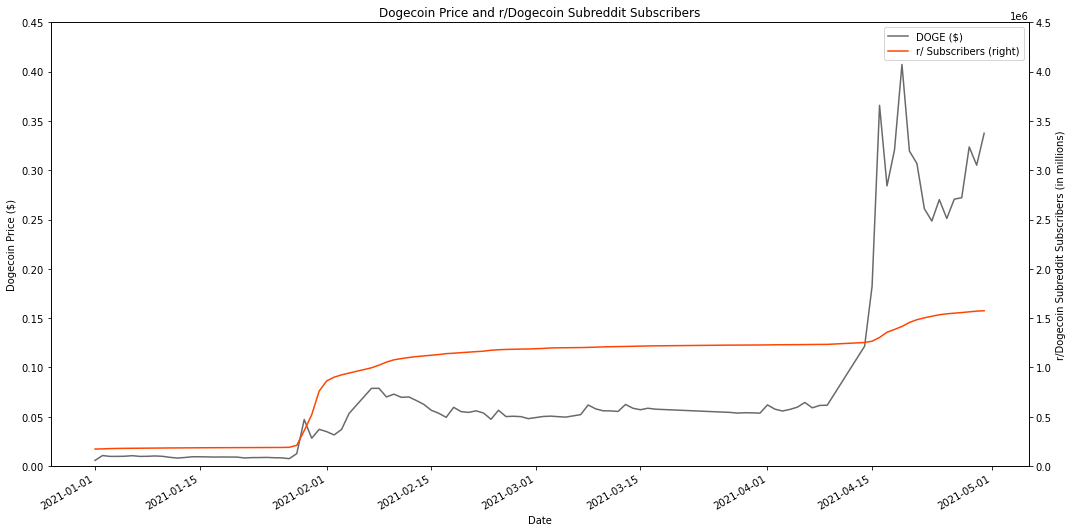

In [32]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_doge_price_reddit['Close'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_doge_price_reddit['subscribers'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='r/ Subscribers', 
                                               logy=False, 
                                               c='orangered'
                                              )

ax.set(title='Dogecoin Price and r/Dogecoin Subreddit Subscribers',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('r/Dogecoin Subreddit Subscribers (in millions)')

ax1.set(ylim=(0, .45))
ax2.set(ylim=(0, 4500000))

fig.tight_layout();

plt.savefig('doge_vs_reddit_subscribers_line.png', facecolor='white', transparent=False)

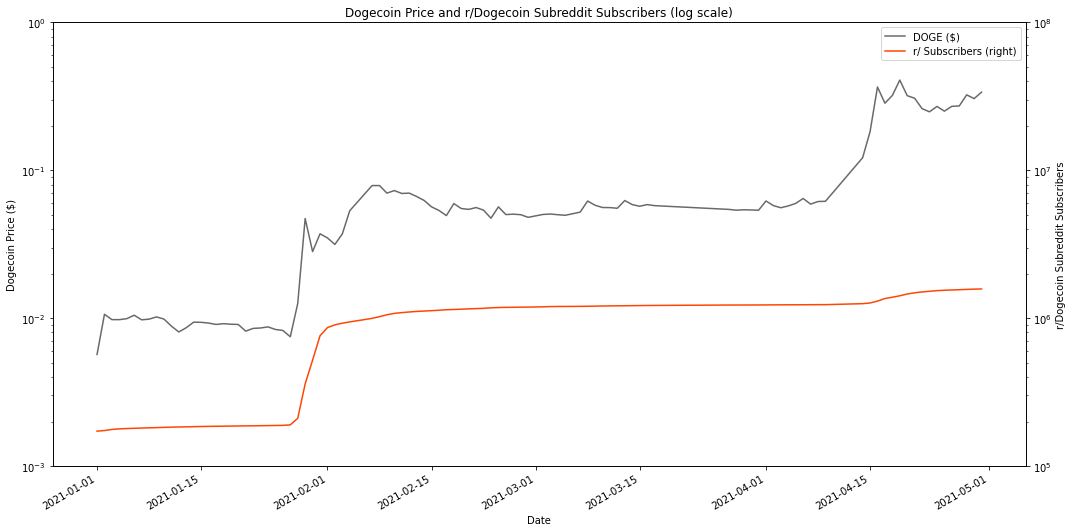

In [26]:
fig, ax = plt.subplots(figsize=(15,7.5))

ax1 = df_doge_price_reddit['Close'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=True, 
                                         c='dimgray'
                                        )

ax2 = df_doge_price_reddit['subscribers'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='r/ Subscribers', 
                                               logy=True, 
                                               c='orangered')

ax.set(title='Dogecoin Price and r/Dogecoin Subreddit Subscribers (log scale)',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('r/Dogecoin Subreddit Subscribers')


ax1.set(ylim=(.001, 1))
ax2.set(ylim=(100000,100000000))

#ax1.set_yticks([.01, .1])
#ax2.set_yticks([100000, 1000000])

fig.tight_layout();

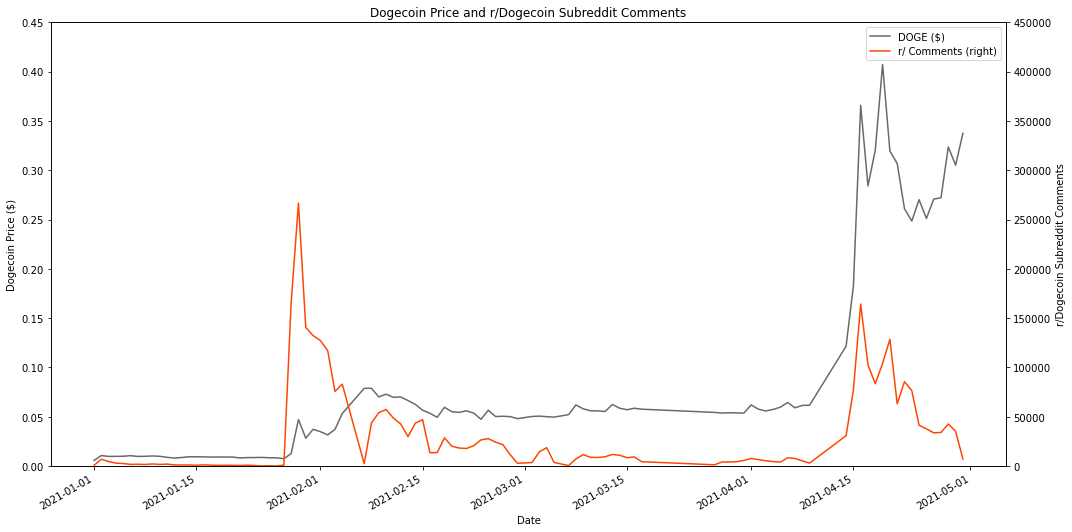

In [33]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_doge_price_reddit['Close'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_doge_price_reddit['comments'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='r/ Comments', 
                                               logy=False, 
                                               c='orangered'
                                              )

ax.set(title='Dogecoin Price and r/Dogecoin Subreddit Comments',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('r/Dogecoin Subreddit Comments')

ax1.set(ylim=(0, .45))
ax2.set(ylim=(0, 450000))

fig.tight_layout();

plt.savefig('doge_vs_reddit_comments_line.png', facecolor='white', transparent=False)

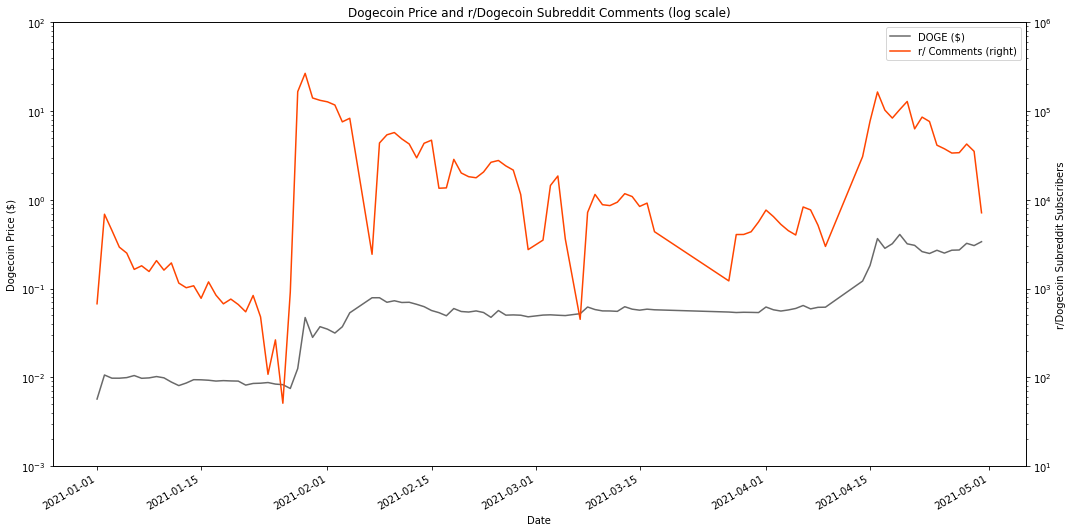

In [246]:
fig, ax = plt.subplots(figsize=(15,7.5))

ax1 = df_doge_price_reddit['Close'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=True, 
                                         c='dimgray'
                                        )

ax2 = df_doge_price_reddit['comments'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='r/ Comments', 
                                               logy=True, 
                                               c='orangered')

ax.set(title='Dogecoin Price and r/Dogecoin Subreddit Comments (log scale)',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('r/Dogecoin Subreddit Subscribers')


ax1.set(ylim=(.001, 100))
ax2.set(ylim=(10,1000000))

#ax1.set_yticks([.01, .1])
#ax2.set_yticks([100000, 1000000])

fig.tight_layout();

In [12]:
import pytz
from pytz import timezone

df_elon_tweets = pd.read_csv('elon_musk_doge_tweets.csv')
df_elon_tweets.set_index('date', inplace=True)
df_elon_tweets.index = pd.to_datetime(df_elon_tweets.index).tz_localize(pytz.timezone('US/Pacific')).tz_convert('utc').date

df_elon_tweets.index

DatetimeIndex(['2021-04-15 04:33:18+00:00', '2021-04-15 04:28:47+00:00',
               '2021-03-18 21:17:16+00:00', '2021-03-15 23:11:50+00:00',
               '2021-03-13 23:46:16+00:00', '2021-03-13 23:40:41+00:00',
               '2021-03-06 04:40:30+00:00', '2021-03-02 21:07:09+00:00',
               '2021-03-01 19:57:08+00:00', '2021-02-21 21:27:06+00:00',
               '2021-02-20 08:42:28+00:00', '2021-02-14 23:33:22+00:00',
               '2021-02-11 23:27:37+00:00', '2021-02-08 05:27:36+00:00',
               '2021-02-07 22:25:14+00:00', '2021-02-04 08:27:10+00:00',
               '2021-02-04 07:35:35+00:00', '2020-12-20 09:30:04+00:00',
               '2020-11-17 18:45:21+00:00', '2020-07-18 00:53:43+00:00'],
              dtype='datetime64[ns, UTC]', name='date', freq=None)

In [27]:
df_elon_tweets_sum = df_elon_tweets.groupby(level=0).sum()

df_elon_tweets_sum = df_elon_tweets_sum[df_elon_tweets_sum.index >= pd.to_datetime('2021-01-01')]

df_elon_tweets_sum.head()

,nlikes
2021-02-04,1035391
2021-02-07,787354
2021-02-08,15478
2021-02-11,28834
2021-02-14,6057


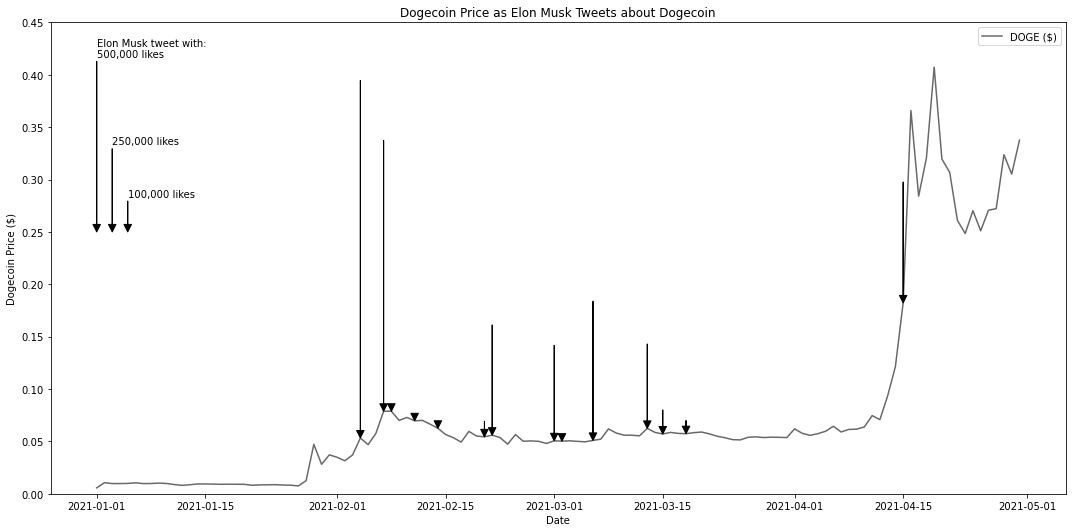

In [113]:

fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_combined_prices['Close_doge'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

# ax2 = df_doge_price_reddit['subscribers'].plot(ax=ax, 
#                                                secondary_y=True, 
#                                                legend=True, 
#                                                label='r/ Subscribers', 
#                                                logy=False, 
#                                                c='orangered'
#                                               )

ax.set(title='Dogecoin Price as Elon Musk Tweets about Dogecoin',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
# ax2.set_ylabel('r/Dogecoin Subreddit Subscribers (in millions)')

ax1.set(ylim=(0, .45))
# ax2.set(ylim=(0, 4500000))



for i in range(len(df_elon_tweets_sum.index)):
    
    if df_elon_tweets_sum['nlikes'][i] > 300000:
        #text = '{:,}'.format(df_elon_tweets_sum['nlikes'][i]) + ' retweets'
        text = ' '
    else:
        text = ' '
    
    ax.annotate(text, rotation=90, 
                xy=(df_elon_tweets_sum.index[i], df_combined_prices['Close_doge'].loc[df_elon_tweets_sum.index[i]]), 
                xytext=(df_elon_tweets_sum.index[i], df_combined_prices['Close_doge'][df_elon_tweets_sum.index[i]] + df_elon_tweets_sum['nlikes'][i] / 3000000), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )

ax.annotate('100,000 likes', 
            xy=(df_combined_prices.index[4], .25),
            xytext=(df_combined_prices.index[4], .25 + 100000 / 3000000),
            arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
           )
ax.annotate('250,000 likes', 
            xy=(df_combined_prices.index[2], .25),
            xytext=(df_combined_prices.index[2], .25 + 250000 / 3000000),
            arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
           )

ax.annotate('''Elon Musk tweet with:
500,000 likes''', 
            xy=(df_combined_prices.index[0], .25),
            xytext=(df_combined_prices.index[0], .25 + 500000 / 3000000),
            arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
           )


fig.tight_layout();

plt.savefig('doge_price_line_elon.png', facecolor='white', transparent=False)

In [4]:
df_twitter = pd.read_csv('tweets_doge_all2.csv')

df_twitter.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1387557236457627653,1387557236457627653,2021-04-28 16:59:59 PDT,2021-04-28,16:59:59,-700,2435986338,dogecointicker,dogecointicker,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1387557180862259206,1387488165175382016,2021-04-28 16:59:46 PDT,2021-04-28,16:59:46,-700,1298038146764947457,williamsroue,ⓣheRoueMcCoy,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'OldManMitchell1', 'name': 'O...",NaN,NaN,NaN,NaN
2,1387557162222768130,1387330273109549058,2021-04-28 16:59:41 PDT,2021-04-28,16:59:41,-700,1379133832604098562,link_polka,Polka Link,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RomainLanery', 'name': 'Roma...",NaN,NaN,NaN,NaN
3,1387557160708608002,1387557160708608002,2021-04-28 16:59:41 PDT,2021-04-28,16:59:41,-700,366094710,queenofdogecoin,DOGEMA👑💎🐾,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1387557153976819715,1387557153976819715,2021-04-28 16:59:39 PDT,2021-04-28,16:59:39,-700,1354955951363788808,chrisdc97,chris c,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [6]:
df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'], utc=True).dt.date

df_twitter.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1387557236457627653,1387557236457627653,2021-04-28 23:59:59+00:00,2021-04-28,16:59:59,-700,2435986338,dogecointicker,dogecointicker,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1387557180862259206,1387488165175382016,2021-04-28 23:59:46+00:00,2021-04-28,16:59:46,-700,1298038146764947457,williamsroue,ⓣheRoueMcCoy,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'OldManMitchell1', 'name': 'O...",NaN,NaN,NaN,NaN
2,1387557162222768130,1387330273109549058,2021-04-28 23:59:41+00:00,2021-04-28,16:59:41,-700,1379133832604098562,link_polka,Polka Link,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RomainLanery', 'name': 'Roma...",NaN,NaN,NaN,NaN
3,1387557160708608002,1387557160708608002,2021-04-28 23:59:41+00:00,2021-04-28,16:59:41,-700,366094710,queenofdogecoin,DOGEMA👑💎🐾,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1387557153976819715,1387557153976819715,2021-04-28 23:59:39+00:00,2021-04-28,16:59:39,-700,1354955951363788808,chrisdc97,chris c,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [36]:
df_twitter_grouped = df_twitter.groupby('created_at').count()['id']

df_twitter_grouped.head()

created_at
2021-01-01     3377
2021-01-02    18671
2021-01-03    11191
2021-01-04     7658
2021-01-05     6166
Name: id, dtype: int64

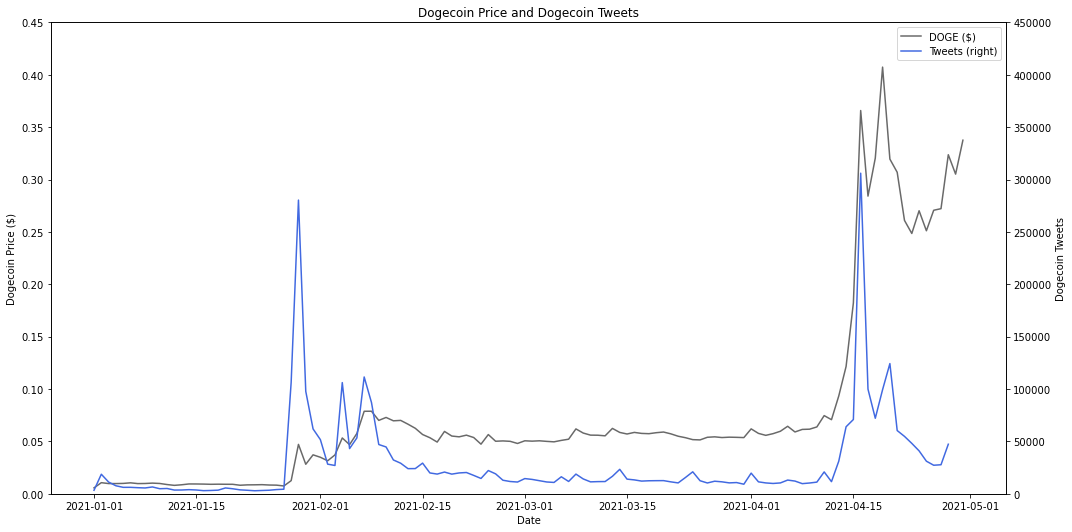

In [37]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_combined_prices['Close_doge'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_twitter_grouped.plot(ax=ax, 
                              secondary_y=True,
                              legend=True, 
                              label='Tweets', 
                              logy=False, 
                              c='royalblue'
                             )

ax.set(title='Dogecoin Price and Dogecoin Tweets',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('Dogecoin Tweets')

ax1.set(ylim=(0, .45))
ax2.set(ylim=(0, 450000))


fig.tight_layout();

plt.savefig('doge_vs_twitter_line.png', facecolor='white', transparent=False)

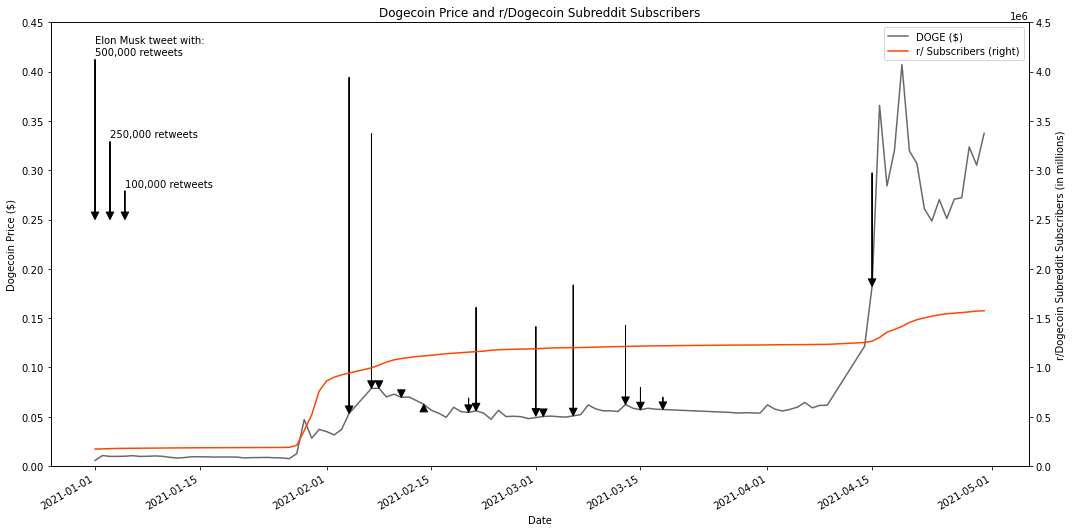

In [38]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_doge_price_reddit['Close'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_doge_price_reddit['subscribers'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='r/ Subscribers', 
                                               logy=False, 
                                               c='orangered'
                                              )

ax.set(title='Dogecoin Price and r/Dogecoin Subreddit Subscribers',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('r/Dogecoin Subreddit Subscribers (in millions)')

ax1.set(ylim=(0, .45))
ax2.set(ylim=(0, 4500000))

for i in range(len(df_elon_tweets_sum.index)):
    
    if df_elon_tweets_sum['nlikes'][i] > 300000:
        #text = '{:,}'.format(df_elon_tweets_sum['nlikes'][i]) + ' retweets'
        text = ' '
    else:
        text = ' '
    
    ax.annotate(text, rotation=90, 
                xy=(df_elon_tweets_sum.index[i], df_combined_prices['Close_doge'].loc[df_elon_tweets_sum.index[i]]), 
                xytext=(df_elon_tweets_sum.index[i], df_combined_prices['Close_doge'][df_elon_tweets_sum.index[i]] + df_elon_tweets_sum['nlikes'][i] / 3000000), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )

ax.annotate('100,000 likes', 
            xy=(df_combined_prices.index[4], .25),
            xytext=(df_combined_prices.index[4], .25 + 100000 / 3000000),
            arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
           )
ax.annotate('250,000 likes', 
            xy=(df_combined_prices.index[2], .25),
            xytext=(df_combined_prices.index[2], .25 + 250000 / 3000000),
            arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
           )

ax.annotate('''Elon Musk tweet with:
500,000 likes''', 
            xy=(df_combined_prices.index[0], .25),
            xytext=(df_combined_prices.index[0], .25 + 500000 / 3000000),
            arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
           )

fig.tight_layout();

plt.savefig('doge_vs_reddit_subscribers_elon_line.png', facecolor='white', transparent=False)

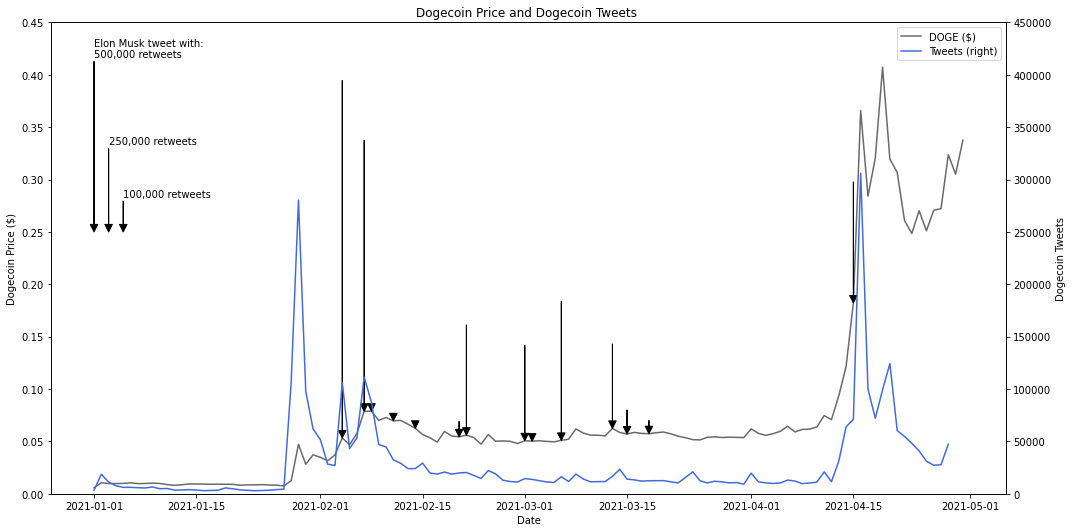

In [39]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_combined_prices['Close_doge'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_twitter_grouped.plot(ax=ax, 
                              secondary_y=True,
                              legend=True, 
                              label='Tweets', 
                              logy=False, 
                              c='royalblue'
                             )

ax.set(title='Dogecoin Price and Dogecoin Tweets ',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('Dogecoin Tweets')

ax1.set(ylim=(0, .45))
ax2.set(ylim=(0, 450000))

for i in range(len(df_elon_tweets_sum.index)):
    
    if df_elon_tweets_sum['nlikes'][i] > 300000:
        #text = '{:,}'.format(df_elon_tweets_sum['nlikes'][i]) + ' retweets'
        text = ' '
    else:
        text = ' '
    
    ax.annotate(text, rotation=90, 
                xy=(df_elon_tweets_sum.index[i], df_combined_prices['Close_doge'].loc[df_elon_tweets_sum.index[i]]), 
                xytext=(df_elon_tweets_sum.index[i], df_combined_prices['Close_doge'][df_elon_tweets_sum.index[i]] + df_elon_tweets_sum['nlikes'][i] / 3000000), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )

ax.annotate('100,000 likes', 
            xy=(df_combined_prices.index[4], .25),
            xytext=(df_combined_prices.index[4], .25 + 100000 / 3000000),
            arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
           )
ax.annotate('250,000 likes', 
            xy=(df_combined_prices.index[2], .25),
            xytext=(df_combined_prices.index[2], .25 + 250000 / 3000000),
            arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
           )

ax.annotate('''Elon Musk tweet with:
500,000 likes''', 
            xy=(df_combined_prices.index[0], .25),
            xytext=(df_combined_prices.index[0], .25 + 500000 / 3000000),
            arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
           )


fig.tight_layout();

plt.savefig('doge_vs_twitter_elon_line.png', facecolor='white', transparent=False)

In [40]:
df_doge_price_twitter = df_doge.join(df_twitter_grouped, how='inner')

df_doge_price_twitter.head()

,Open,High,Low,Close,Adj Close,Volume,Percent_Change,Change_Close_Less_Open,id
2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,228961515,21.448413,0.001004,3377
2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3421562680,86.686591,0.004929,18671
2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2707003608,-7.838148,-0.000831,11191
2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1372398979,-0.183961,-0.000018,7658
2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,687256067,1.566504,0.000153,6166


The correlation is 0.5
Regression Line: y = 0.0x + 0.045; r^2 = 0.252


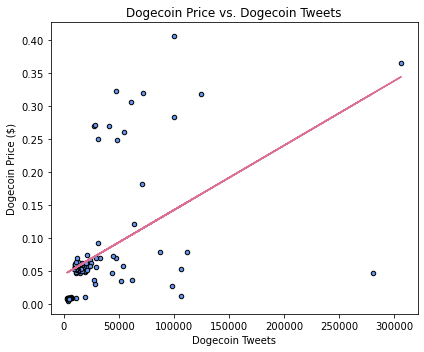

In [41]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

tweets = df_doge_price_twitter['id']
doge = df_doge_price_twitter['Close']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tweets, doge)
regress_values = tweets * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots(figsize=(6,5))
df_doge_price_twitter.plot(kind='scatter', 
                 ax=ax, 
                 x='id', 
                 y='Close',
                 c='cornflowerblue',
                 marker='o', 
                 edgecolor='black'                 
                )

# plot trend linear regression line and annotate

ax.plot(tweets, regress_values, c='palevioletred')

ax.set(title='Dogecoin Price vs. Dogecoin Tweets',
       xlabel = 'Dogecoin Tweets',
       ylabel = 'Dogecoin Price ($)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(tweets, doge)

print(f'''The correlation is {round(correlation[0], 2)}
Regression Line: {regress_eq}''')

plt.savefig('doge_vs_twitter.png', facecolor='white', transparent=False)

The correlation is 0.44
Regression Line: y = 0.0x + -1.416; r^2 = 0.193


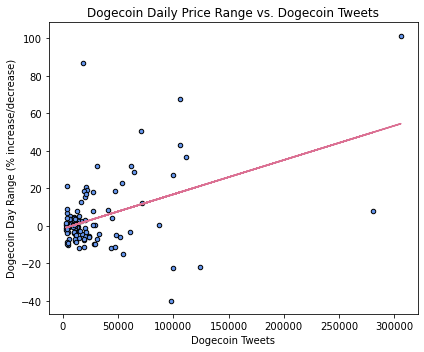

In [44]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

tweets = df_doge_price_twitter['id']
doge = df_doge_price_twitter['Percent_Change']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tweets, doge)
regress_values = tweets * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots(figsize=(6,5))
df_doge_price_twitter.plot(kind='scatter', 
                 ax=ax, 
                 x='id', 
                 y='Percent_Change',
                 c='cornflowerblue',
                 marker='o', 
                 edgecolor='black'                 
                )

# plot trend linear regression line and annotate

ax.plot(tweets, regress_values, c='palevioletred')

ax.set(title='Dogecoin Daily Price Range vs. Dogecoin Tweets',
       xlabel = 'Dogecoin Tweets',
       ylabel = 'Dogecoin Day Range (% increase/decrease)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(tweets, doge)

print(f'''The correlation is {round(correlation[0], 2)}
Regression Line: {regress_eq}''')

plt.savefig('doge_vs_twitter_chagne.png', facecolor='white', transparent=False)

In [84]:
ax.set(xlim=(dt.datetime(2021, 1, 25), dt.datetime(2021, 2, 10)))

<function datetime.date>

In [1]:
df_elon_tweets_sum.index.dt.tzinfo()

NameError: name 'df_elon_tweets_sum' is not defined

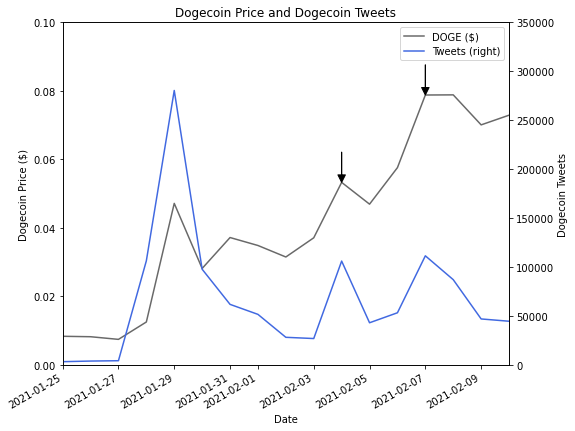

In [93]:
fig, ax = plt.subplots(figsize=(8,7))
ax1 = df_combined_prices['Close_doge'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_twitter_grouped.plot(ax=ax, 
                              secondary_y=True,
                              legend=True, 
                              label='Tweets', 
                              logy=False, 
                              c='royalblue'
                             )

ax.set(title='Dogecoin Price and Dogecoin Tweets',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('Dogecoin Tweets')

ax1.set(ylim=(0, .10))
ax2.set(ylim=(0, 350000))

ax.set(xlim=(dt.datetime(2021, 1, 25), dt.datetime(2021, 2, 10)))

ax1.annotate(text, rotation=90, 
                xy=(dt.date(2021, 2, 4), df_combined_prices['Close_doge'][dt.date(2021, 2, 4)]), 
                xytext=(dt.date(2021, 2, 4), df_combined_prices['Close_doge'][dt.date(2021, 2, 4)] + .01), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )

ax1.annotate(text, rotation=90, 
                xy=(dt.date(2021, 2, 7), df_combined_prices['Close_doge'][dt.date(2021, 2, 7)]), 
                xytext=(dt.date(2021, 2, 7), df_combined_prices['Close_doge'][dt.date(2021, 2, 7)] + .01), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )  

fig.autofmt_xdate()

plt.savefig('doge_vs_twitter_zoom1.png', facecolor='white', transparent=False)

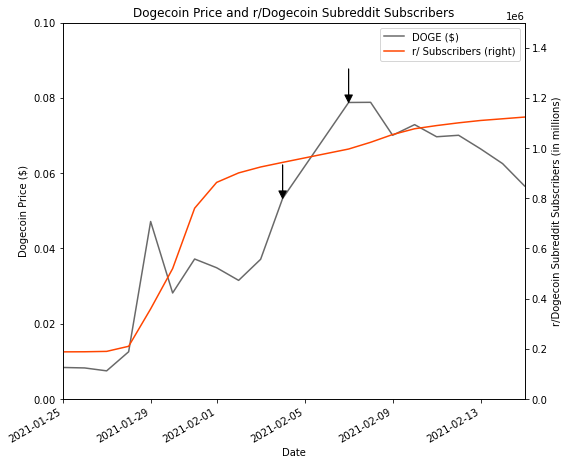

In [96]:
fig, ax = plt.subplots(figsize=(8,7))
ax1 = df_doge_price_reddit['Close'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_doge_price_reddit['subscribers'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='r/ Subscribers', 
                                               logy=False, 
                                               c='orangered'
                                              )

ax.set(title='Dogecoin Price and r/Dogecoin Subreddit Subscribers',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('r/Dogecoin Subreddit Subscribers (in millions)')

ax1.set(ylim=(0, .10))
ax2.set(ylim=(0, 1500000))

ax.set(xlim=(dt.datetime(2021, 1, 25), dt.datetime(2021, 2, 15)))

ax1.annotate(text, rotation=90, 
                xy=(dt.date(2021, 2, 4), df_combined_prices['Close_doge'][dt.date(2021, 2, 4)]), 
                xytext=(dt.date(2021, 2, 4), df_combined_prices['Close_doge'][dt.date(2021, 2, 4)] + .01), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )

ax1.annotate(text, rotation=90, 
                xy=(dt.date(2021, 2, 7), df_combined_prices['Close_doge'][dt.date(2021, 2, 7)]), 
                xytext=(dt.date(2021, 2, 7), df_combined_prices['Close_doge'][dt.date(2021, 2, 7)] + .01), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )   

fig.tight_layout();

fig.autofmt_xdate()

plt.savefig('doge_vs_reddit_zoom1a.png', facecolor='white', transparent=False)

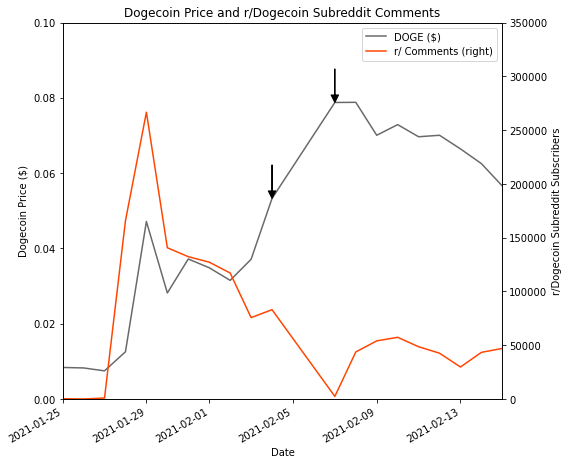

In [110]:
fig, ax = plt.subplots(figsize=(8,7))

ax1 = df_doge_price_reddit['Close'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_doge_price_reddit['comments'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='r/ Comments', 
                                               logy=False, 
                                               c='orangered')

ax.set(title='Dogecoin Price and r/Dogecoin Subreddit Comments',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('r/Dogecoin Subreddit Subscribers')

ax.set(xlim=(dt.datetime(2021, 1, 25), dt.datetime(2021, 2, 15)))

ax1.set(ylim=(0, .10))
ax2.set(ylim=(0, 350000))

ax1.annotate(text, rotation=90, 
                xy=(dt.date(2021, 2, 4), df_combined_prices['Close_doge'][dt.date(2021, 2, 4)]), 
                xytext=(dt.date(2021, 2, 4), df_combined_prices['Close_doge'][dt.date(2021, 2, 4)] + .01), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )

ax1.annotate(text, rotation=90, 
                xy=(dt.date(2021, 2, 7), df_combined_prices['Close_doge'][dt.date(2021, 2, 7)]), 
                xytext=(dt.date(2021, 2, 7), df_combined_prices['Close_doge'][dt.date(2021, 2, 7)] + .01), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )  

fig.tight_layout();

fig.autofmt_xdate()

plt.savefig('doge_vs_reddit_zoom1b.png', facecolor='white', transparent=False)

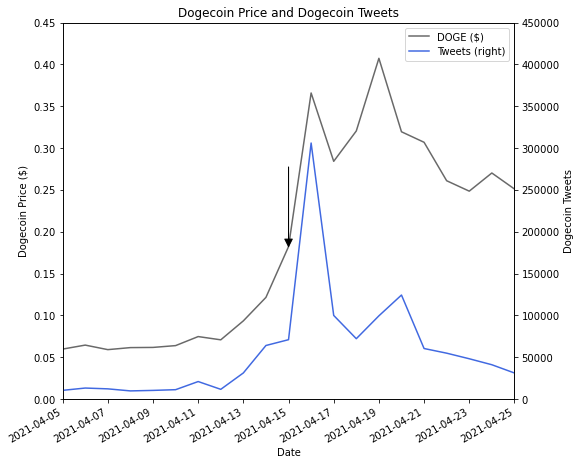

In [105]:
fig, ax = plt.subplots(figsize=(8,7))
ax1 = df_combined_prices['Close_doge'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_twitter_grouped.plot(ax=ax, 
                              secondary_y=True,
                              legend=True, 
                              label='Tweets', 
                              logy=False, 
                              c='royalblue'
                             )

ax.set(title='Dogecoin Price and Dogecoin Tweets',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('Dogecoin Tweets')

ax1.set(ylim=(0, .45))
ax2.set(ylim=(0, 450000))

ax.set(xlim=(dt.datetime(2021, 4, 5), dt.datetime(2021, 4, 25)))
  
ax1.annotate(text, rotation=90, 
                xy=(dt.date(2021, 4, 15), df_combined_prices['Close_doge'][dt.date(2021, 4, 15)]), 
                xytext=(dt.date(2021, 4, 15), df_combined_prices['Close_doge'][dt.date(2021, 4, 15)] + .1), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )   

fig.tight_layout();

fig.autofmt_xdate()

plt.savefig('doge_vs_twitter_zoom2.png', facecolor='white', transparent=False)

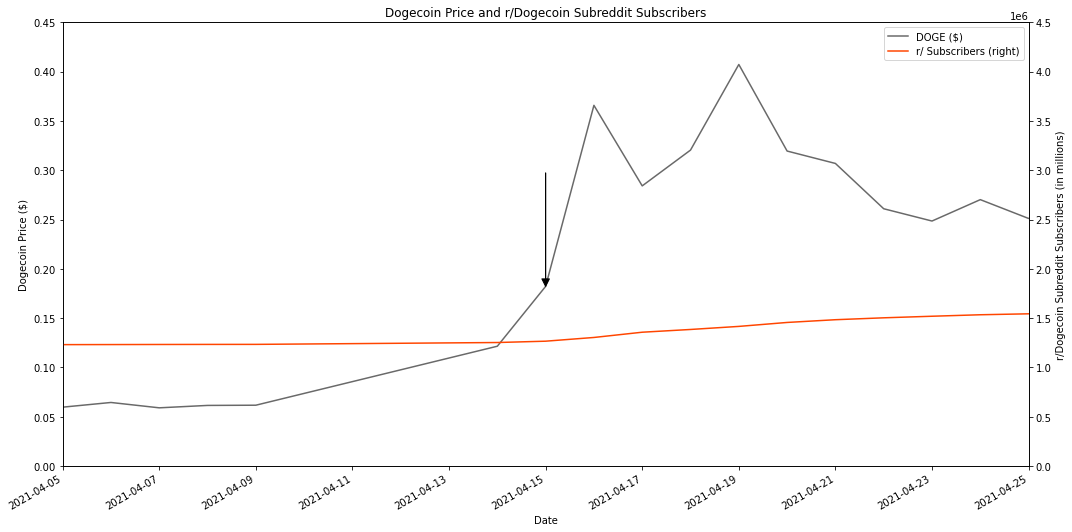

In [227]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_doge_price_reddit['Close'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_doge_price_reddit['subscribers'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='r/ Subscribers', 
                                               logy=False, 
                                               c='orangered'
                                              )

ax.set(title='Dogecoin Price and r/Dogecoin Subreddit Subscribers',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('r/Dogecoin Subreddit Subscribers (in millions)')

ax1.set(ylim=(0, .45))
ax2.set(ylim=(0, 4500000))

ax.set(xlim=(dt.datetime(2021, 4, 5), dt.datetime(2021, 4, 25)))
  
ax1.annotate(text, rotation=90, 
                xy=(dt.date(2021, 4, 15), df_combined_prices['Close_doge'][dt.date(2021, 4, 15)]), 
                xytext=(dt.date(2021, 4, 15), df_combined_prices['Close_doge'][dt.date(2021, 4, 15)] + df_elon_tweets_sum['nlikes'][dt.date(2021, 4, 15)] / 3000000), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )   

fig.tight_layout();

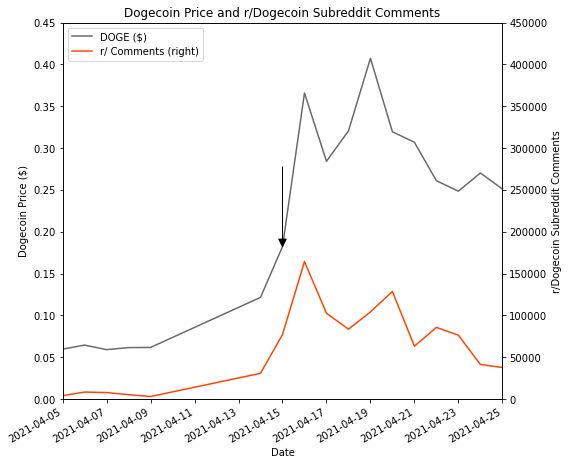

In [112]:
fig, ax = plt.subplots(figsize=(8,7))
ax1 = df_doge_price_reddit['Close'].plot(ax=ax, 
                                         legend=True, 
                                         label='DOGE ($)', 
                                         logy=False, 
                                         c='dimgray'
                                        )

ax2 = df_doge_price_reddit['comments'].plot(ax=ax, 
                                               secondary_y=True, 
                                               legend=True, 
                                               label='r/ Comments', 
                                               logy=False, 
                                               c='orangered'
                                              )

ax.set(title='Dogecoin Price and r/Dogecoin Subreddit Comments',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('r/Dogecoin Subreddit Comments')

ax1.set(ylim=(0, .45))
ax2.set(ylim=(0, 450000))

ax.set(xlim=(dt.datetime(2021, 4, 5), dt.datetime(2021, 4, 25)))
  
ax1.annotate(text, rotation=90, 
                xy=(dt.date(2021, 4, 15), df_combined_prices['Close_doge'][dt.date(2021, 4, 15)]), 
                xytext=(dt.date(2021, 4, 15), df_combined_prices['Close_doge'][dt.date(2021, 4, 15)] + .1), 
                arrowprops=dict(facecolor='black', shrink=1, width=.01, headwidth=7.5, headlength=7.5)
                )   

fig.tight_layout();

fig.autofmt_xdate()

plt.savefig('doge_vs_reddit_zoom2.png', facecolor='white', transparent=False)